# Read data and make a map

Using this dataset: https://pubs.usgs.gov/dds/dds-033/USGS_3D/ssx_txt/3dstart.htm

In [91]:
with open('../data/sussex/UWI_4900521053.txt', 'rt') as f:
    tops = {}
    for line in f:
        if line.startswith('# Por'):
            break
        elif line.startswith('#'):
            continue
        top, depth = line.split(',')
        tops[top] = float(depth)
tops

{'Ardmore': 8125.0,
 'Cody': 8168.0,
 'Sussex Upper Base': 8170.0,
 'Sussex Upper Top': 8170.0,
 'Sussex Lower Base': 8172.0,
 'Sussex Lower Top': 8172.0,
 'Niobrara': 8184.0}

## Make it a function

In [6]:
def get_tops(fname):
    with open(fname, 'rt') as f:
        tops = {}
        for line in f:
            if line.startswith('# Por'):
                break
            elif line.startswith('#'):
                continue
            top, depth = line.split(',')
            tops[top] = float(depth)
    return tops

get_tops('../data/sussex/UWI_4900521053.txt')

{'Ardmore': 8125.0,
 'Cody': 8168.0,
 'Sussex Upper Base': 8170.0,
 'Sussex Upper Top': 8170.0,
 'Sussex Lower Base': 8172.0,
 'Sussex Lower Top': 8172.0,
 'Niobrara': 8184.0}

Now...

- Deal with -999.25
- Deal with Units
- Optionally record TVDSS instead of MD

In [7]:
import math

def clean_depth(depth):
    stripped = depth.lower().strip('mft \n\t')
    return stripped

def get_tops(fname, datum='KB'):
    """
    Read tops from files.
    """
    with open(fname, 'rt') as f:
        tops = {}
        for line in f:

            if line.startswith('# Por'):
                break
            elif line.startswith('# UNIT'):
                _, units = line.split(':')
                units = units.strip()
                continue
            elif line.startswith('# KB'):
                _, kb = line.split(':')
                kb = float(clean_depth(kb))
                continue
            elif line.startswith('#'):
                continue
                
            if units == 'FT':
                mult = 0.3048
            else:
                mult = 1.0
                
            if datum.upper() == 'SS':
                adj = kb
            else:
                adj = 0
                
            top, depth = line.split(',')
            
            if float(depth) == -999.25:
                continue

            tops[top] = mult * float(depth) - adj

    return tops

get_tops('../data/sussex/UWI_4900521053.txt')

{'Ardmore': 2476.5,
 'Cody': 2489.6064,
 'Sussex Upper Base': 2490.2160000000003,
 'Sussex Upper Top': 2490.2160000000003,
 'Sussex Lower Base': 2490.8256,
 'Sussex Lower Top': 2490.8256,
 'Niobrara': 2494.4832}

Try on the file `UWI_4900523208.txt`, which is missing Sussex Lower:

In [13]:
get_tops('../data/sussex/UWI_4900523208.txt', datum='SS')

{'Sussex Upper Base': -2636.7696,
 'Ardmore': -2655.6672,
 'Cody': -2640.4272,
 'Niobrara': -2634.9408,
 'Sussex Upper Top': -2640.4272}

## Glob all the files!

Stick to those called `UWI_*.txt` for now.

In [14]:
import glob
import os

def get_all_tops(path):
    wells = {}
    for fname in glob.glob(path):
        well = os.path.basename(fname)[4:-4]
        wells[int(well)] = get_tops(fname)
    return wells

get_all_tops('../data/sussex/UWI_*.txt')

{4900523570: {'Ardmore': 2484.73,
  'Cody': 2496.62,
  'Sussex Upper Top': 2496.92,
  'Sussex Lower Top': 2502.1,
  'Sussex Upper Base': 2502.1,
  'Sussex Lower Base': 2505.46,
  'Niobrara': 2505.76},
 4900525104: {'Sussex Upper Base': 2426.21,
  'Sussex Upper Top': 2422.86,
  'Cody': 2421.33,
  'Sussex Lower Base': 2427.12,
  'Ardmore': 2411.88,
  'Sussex Lower Top': 2426.21,
  'Niobrara': 2428.04},
 4900524202: {'Ardmore': 2411.2728,
  'Cody': 2424.3792000000003,
  'Sussex Upper Top': 2424.3792000000003,
  'Sussex Upper Base': 2426.8176000000003,
  'Sussex Lower Top': 2427.1224,
  'Sussex Lower Base': 2430.1704,
  'Niobrara': 2431.6944000000003},
 4900525135: {'Ardmore': 2393.5944,
  'Cody': 2407.3104000000003,
  'Sussex Upper Top': 2407.6152,
  'Sussex Upper Base': 2410.3584,
  'Niobrara': 2410.9680000000003},
 4900523719: {'Ardmore': 2420.11,
  'Cody': 2433.22,
  'Sussex Upper Top': 2435.35,
  'Sussex Upper Base': 2438.4,
  'Sussex Lower Top': 2439.31,
  'Sussex Lower Base': 2442.3

## The other files

Try to read a well file without the `UWI_` prefix. Adapt your function to read it.

You'll need to make the comment character and the separator into arguments to the function.

In [16]:
def get_tops(fname, datum='KB', comment='#', sep='\t'):
    """
    Read tops from files.
    """
    with open(fname, 'rt') as f:
        tops = {}
        for line in f:

            if line.startswith(f'{comment} Por'):
                break
            elif line.startswith(f'{comment} UNIT'):
                _, units = line.split(':')
                units = units.strip()
                continue
            elif line.startswith(f'{comment} KB'):
                _, kb = line.split(':')
                kb = float(clean_depth(kb))
                continue
            elif line.startswith(f'{comment}'):
                continue
                
            if units == 'FT':
                mult = 0.3048
            else:
                mult = 1.0
                
            if datum.upper() == 'SS':
                adj = kb
            else:
                adj = 0
                
            top, depth = line.split(sep)
            
            if float(depth) == -999.25:
                continue

            tops[top] = mult * float(depth) - adj

    return tops

get_tops('../data/sussex/4900523357.txt', comment='%', sep='\t')

{'Sussex Upper Base': 2501.19,
 'Sussex Upper Top': 2497.23,
 'Niobrara': 2503.32,
 'Cody': 2496.92,
 'Ardmore': 2483.21,
 'Sussex Lower Top': 2503.02,
 'Sussex Lower Base': 2503.02}

## Read all the files!

In [17]:
def strip_prefix_suffix(string, prefix, suffix):
    if string.startswith(prefix):
        string = string[len(prefix):]
    if string.endswith(suffix):
        string = string[:-len(suffix)]
    return string

strip_prefix_suffix('UWI_1234567.txt', 'UWI_', '.txt')

'1234567'

In [18]:
def get_all_tops(path):
    wells = {}
    for fname in glob.glob(path):
        well = os.path.basename(fname)
        well = strip_prefix_suffix(well, 'UWI_', '.txt')
        with open(fname) as f:
            c = f.read(1)
            s = ',' if c == '#' else '\t'
        wells[int(well)] = get_tops(fname, comment=c, sep=s)
    return wells

data = get_all_tops('../data/sussex/*.txt')
data

{4900523570: {'Ardmore': 2484.73,
  'Cody': 2496.62,
  'Sussex Upper Top': 2496.92,
  'Sussex Lower Top': 2502.1,
  'Sussex Upper Base': 2502.1,
  'Sussex Lower Base': 2505.46,
  'Niobrara': 2505.76},
 4900523478: {'Ardmore': 2476.5,
  'Cody': 2488.3872,
  'Sussex Upper Top': 2488.3872,
  'Sussex Upper Base': 2490.5208000000002,
  'Niobrara': 2494.4832},
 4900525104: {'Sussex Upper Base': 2426.21,
  'Sussex Upper Top': 2422.86,
  'Cody': 2421.33,
  'Sussex Lower Base': 2427.12,
  'Ardmore': 2411.88,
  'Sussex Lower Top': 2426.21,
  'Niobrara': 2428.04},
 4900524202: {'Ardmore': 2411.2728,
  'Cody': 2424.3792000000003,
  'Sussex Upper Top': 2424.3792000000003,
  'Sussex Upper Base': 2426.8176000000003,
  'Sussex Lower Top': 2427.1224,
  'Sussex Lower Base': 2430.1704,
  'Niobrara': 2431.6944000000003},
 4900525135: {'Ardmore': 2393.5944,
  'Cody': 2407.3104000000003,
  'Sussex Upper Top': 2407.6152,
  'Sussex Upper Base': 2410.3584,
  'Niobrara': 2410.9680000000003},
 4900523719: {'Ardm

In [19]:
len(data)

55

## Get porosity

Get the mean of all the porosity readings in the Upper Sussex.

In [137]:
!head -20 ../data/sussex/UWI_4900521053.txt

# LOC: 115879.27,-90882.55
# KB: 5095.00 FT
# TD: 8286.00 FT
# UNITS: FT
# Formations
Ardmore,8125.00
Cody,8168.00
Sussex Upper Base,8170.00
Sussex Upper Top,8170.00
Sussex Lower Base,8172.00
Sussex Lower Top,8172.00
Niobrara,8184.00
# Porosity
8166.00,6.000
8168.00,2.000
8170.00,3.000
8172.00,7.000
8174.00,7.000
8176.00,9.000
8178.00,10.000


In [ ]:
            if line.startswith(f'{comment} LOC'):
                _, xy = line.split(':')
                x, y = xy.split(',')
                x, y = float(x), float(y)
                continue
            elif line.startswith(f'{comment} KB'):
                _, kb = line.split(':')
                kb = float(clean_depth(kb))
                continue
            elif line.startswith(f'{comment} UNIT'):
                _, units = line.split(':')
                units = units.strip()
                continue


In [142]:
def get_data(fname, datum='KB', comment='#', sep='\t'):
    """
    Read tops from files.
    """
    with open(fname, 'rt') as f:
        tops, porosities = {}, {}
        mode = 'header'
        for line in f:
            if line.startswith(comment) and (':' in line):
                line = line.replace(comment, '').strip()
                header_item = line.split(':')[0]: 
                parse_header_line(line)
            if line.startswith(f'{comment} LOC'):
                _, xy = line.split(':')
                x, y = xy.split(',')
                x, y = float(x), float(y)
                continue
            elif line.startswith(f'{comment} KB'):
                _, kb = line.split(':')
                kb = float(clean_depth(kb))
                continue
            elif line.startswith(f'{comment} UNIT'):
                _, units = line.split(':')
                units = units.strip()
                continue
            elif line.startswith(f'{comment}') and line[2:3].isalpha():
                mode = line.replace(comment, '').strip().lower()
                continue
            else line.startswith(f'{comment}'):
                continue
                
            if units == 'FT':
                mult = 0.3048
            else:
                mult = 1.0
                
            if datum.upper() == 'SS':
                adj = mult * kb
            else:
                adj = 0
                                
            if mode == 'formations':
                top, depth = line.split(sep)
                if float(depth) == -999.25:
                    continue
                tops[top] = mult * float(depth) - adj
            elif mode == 'porosity':
                depth, porosity = line.split(sep)
                if units == 'FT':
                    porosity = float(porosity) / 100
                else:
                    porosity = float(porosity)
                porosities[mult * float(depth) - adj] = porosity
                
    return (mult * x, mult * y), tops, porosities

get_data('../data/sussex/4900523357.txt', comment='%')

formations
formations
formations
formations
formations
formations
formations
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity


((36170.0, -30156.0),
 {'Sussex Upper Base': 2501.19,
  'Sussex Upper Top': 2497.23,
  'Niobrara': 2503.32,
  'Cody': 2496.92,
  'Ardmore': 2483.21,
  'Sussex Lower Top': 2503.02,
  'Sussex Lower Base': 2503.02},
 {2495.09: 0.033,
  2495.7: 0.008,
  2496.31: 0.003,
  2496.92: 0.01,
  2497.53: 0.013,
  2498.14: 0.089,
  2498.75: 0.094,
  2499.36: 0.058,
  2499.97: 0.048,
  2500.58: 0.079,
  2501.19: 0.023,
  2501.8: 0.023,
  2502.41: 0.01,
  2503.02: 0.023,
  2503.63: 0.013,
  2504.24: 0.01,
  2504.85: 0.01,
  2505.46: 0.003})

In [142]:
# NEW
def get_data(fname, datum='KB', comment='#', sep='\t'):
    """
    Read tops from files.
    """
    with open(fname, 'rt') as f:
        data = {'header': {}}
        header = {}
        for line in f:
            if line.startswith(comment) and (':' in line):
                line = line.replace(comment, '').strip()
                header_item = {line.split(':')[0]: line.split(':')[1]}
                data['header'].update(header_item)
                continue
            elif line.startswith(comment) and line[2:3].isalpha():
                mode = line.replace(comment, '').strip().lower()
                data.update({mode: {}})
                continue
            else line.startswith(comment):
                continue
                
            if data['header']['UNIT'] == 'FT':
                mult = 0.3048
            else:
                mult = 1.0
                
            if data['header']['KB'].upper() == 'SS':
                adj = mult * kb
            else:
                adj = 0
                                
            key, value = line.split(sep)
            
            if (float(depth) == -999.25:
                continue
                tops[top] = mult * float(depth) - adj
            elif mode == 'porosity':
                depth, porosity = line.split(sep)
                if data['header']['UNIT'] == 'FT':
                    porosity = float(porosity) / 100
                else:
                    porosity = float(porosity)
                porosities[mult * float(depth) - adj] = porosity
                
    return (mult * x, mult * y), tops, porosities

get_data('../data/sussex/4900523357.txt', comment='%')

formations
formations
formations
formations
formations
formations
formations
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity
porosity


((36170.0, -30156.0),
 {'Sussex Upper Base': 2501.19,
  'Sussex Upper Top': 2497.23,
  'Niobrara': 2503.32,
  'Cody': 2496.92,
  'Ardmore': 2483.21,
  'Sussex Lower Top': 2503.02,
  'Sussex Lower Base': 2503.02},
 {2495.09: 0.033,
  2495.7: 0.008,
  2496.31: 0.003,
  2496.92: 0.01,
  2497.53: 0.013,
  2498.14: 0.089,
  2498.75: 0.094,
  2499.36: 0.058,
  2499.97: 0.048,
  2500.58: 0.079,
  2501.19: 0.023,
  2501.8: 0.023,
  2502.41: 0.01,
  2503.02: 0.023,
  2503.63: 0.013,
  2504.24: 0.01,
  2504.85: 0.01,
  2505.46: 0.003})

In [93]:
def get_all_tops(path):
    wells = {}
    for fname in glob.glob(path):
        well = os.path.basename(fname)
        well = strip_prefix_suffix(well, 'UWI_', '.txt')
        with open(fname) as f:
            c = f.read(1)
            s = ',' if c == '#' else '\t'
        (x, y), tops, pors = get_data(fname, comment=c, sep=s)
        wells[int(well)] = {
            'location': (x, y),
            'tops': tops,
            'porosities': pors,
        }
    return wells

data = get_all_tops('../data/sussex/*.txt')
data

{4900523570: {'location': (38990.0, -32474.0),
  'tops': {'Ardmore': 2484.73,
   'Cody': 2496.62,
   'Sussex Upper Top': 2496.92,
   'Sussex Lower Top': 2502.1,
   'Sussex Upper Base': 2502.1,
   'Sussex Lower Base': 2505.46,
   'Niobrara': 2505.76},
  'porosities': {2495.09: 0.05,
   2495.7: 0.08,
   2496.31: 0.08,
   2496.92: 0.08,
   2497.53: 0.13,
   2498.14: 0.11,
   2498.75: 0.14,
   2499.36: 0.155,
   2499.97: 0.15,
   2500.58: 0.145,
   2501.19: 0.15,
   2501.8: 0.13,
   2502.41: 0.11,
   2503.02: 0.095,
   2503.63: 0.09,
   2504.24: 0.09,
   2504.85: 0.08,
   2505.46: 0.09,
   2506.07: 0.065,
   2506.68: 0.07,
   2507.28: 0.07}},
 4900523478: {'location': (36959.999232, -30417.000888000002),
  'tops': {'Ardmore': 2476.5,
   'Cody': 2488.3872,
   'Sussex Upper Top': 2488.3872,
   'Sussex Upper Base': 2490.5208000000002,
   'Niobrara': 2494.4832},
  'porosities': {2486.5584000000003: 0.053399999999999996,
   2487.168: 0.0229,
   2487.7776000000003: 0.0432,
   2488.3872: 0.0941,


In [114]:
import numpy as np

xy = np.array([d['location'] for k, d in data.items()])
xy

array([[ 38990.      , -32474.      ],
       [ 36959.999232, -30417.000888],
       [ 38940.      , -29139.      ],
       [ 39459.999312, -30265.000176],
       [ 38540.000136, -27146.999808],
       [ 41180.      , -33392.      ],
       [ 39500.      , -31934.      ],
       [ 36110.000424, -29575.000032],
       [ 40230.000312, -34059.001224],
       [ 39690.001392, -33268.999248],
       [ 47080.      , -39185.      ],
       [ 40190.001408, -31218.999792],
       [ 40329.999096, -30222.998736],
       [ 36930.000816, -26729.000136],
       [ 39380.      , -31174.      ],
       [ 40310.      , -32808.      ],
       [ 41340.      , -34941.      ],
       [ 35620.000896, -29315.99928 ],
       [ 35580.      , -30228.      ],
       [ 39330.      , -27493.      ],
       [ 38569.998552, -30353.998728],
       [ 36960.      , -30879.      ],
       [ 39639.998952, -34086.000408],
       [ 37780.      , -30287.      ],
       [ 41015.      , -34055.      ],
       [ 37180.      , -2

In [115]:
porosity = []
for api, dicts in data.items():
    top = dicts['tops'].get('Sussex Upper Top')
    base = dicts['tops'].get('Sussex Upper Base')
    if (top is None) or (base is None):
        porosity.append(np.nan)
        continue
    pors = []
    for depth, por in dicts['porosities'].items():
        if (top < depth < base) and (not np.isnan(por)):
            pors.append(por)
    if pors:
        porosity.append(np.mean(pors))
    else:
        porosity.append(np.nan)
porosity = np.array(porosity)

In [116]:
xy = xy[~np.isnan(porosity)]
porosity = porosity[~np.isnan(porosity)]

In [117]:
margin = np.array([250, 250])
(x_min, y_min), (x_max, y_max) = xy.min(axis=0) - margin, xy.max(axis=0) + margin
extent = [x_min, x_max, y_min, y_max]

In [118]:
extent

[35079.998936, 42230.0, -35102.999128, -24990.0]

In [119]:
x, y = xy.T

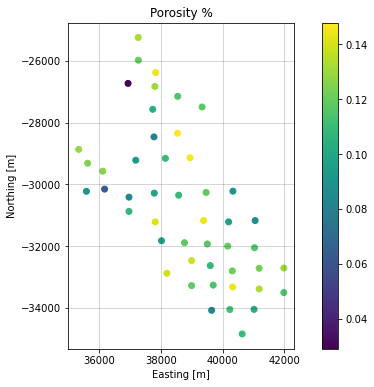

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

plot = ax.scatter(x, y, c=porosity)
ax.set_aspect(1)
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Porosity %')
ax.grid(c='k', alpha=0.2)

plt.colorbar(plot)
plt.show()

In [121]:
grid_y, grid_x = np.mgrid[y_min:y_max:250, x_min:x_max:250]

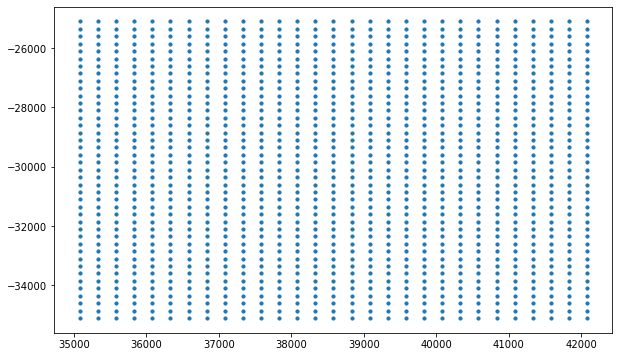

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(grid_x, grid_y, s=10)

In [123]:
from scipy.interpolate import Rbf

rbfi = Rbf(x, y, porosity)

di = rbfi(grid_x, grid_y)

In [124]:
mi = np.min(np.hstack([di.ravel(), porosity]))
ma = np.max(np.hstack([di.ravel(), porosity]))

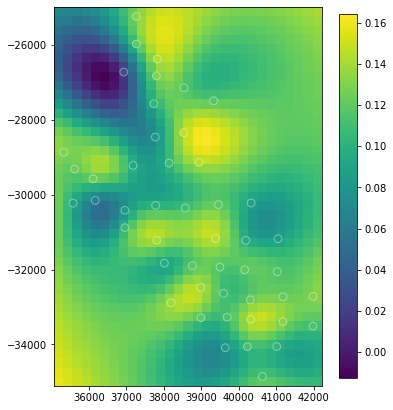

In [125]:
plt.figure(figsize=(6, 10))
c1 = plt.imshow(di, origin="lower", extent=extent, vmin=mi, vmax=ma)
c2 = plt.scatter(x, y, s=60, c=porosity, edgecolor='#ffffff66', vmin=mi, vmax=ma)

plt.colorbar(c1, shrink=0.67)
plt.show()
